## Exercise-2

Wenfeng Zhu-Computer Vision and Deep Learning: Visual Synthesis

### Importing the necessary libraries

In [1]:
import numpy as np
import sklearn.datasets
import sklearn.neighbors
import matplotlib.pyplot as plt

### Data generation

In [2]:
def make_data(noise=0.2, outlier=1):
    prng = np.random.RandomState(0)
    n = 500

    x0 = np.array([0, 0])[None, :] + noise * prng.randn(n, 2)
    y0 = np.ones(n)
    x1 = np.array([1, 1])[None, :] + noise * prng.randn(n, 2)
    y1 = -1 * np.ones(n)

    x = np.concatenate([x0, x1])
    y = np.concatenate([y0, y1]).astype(np.int32)

    xtrain, xtest, ytrain, ytest = sklearn.model_selection.train_test_split(
        x, y, test_size=0.1, shuffle=True, random_state=0)
    xplot, yplot = xtrain, ytrain

    outlier = outlier * np.array([1, 1.75])[None, :]
    youtlier = np.array([-1])
    xtrain = np.concatenate([xtrain, outlier])
    ytrain = np.concatenate([ytrain, youtlier])
    return xtrain, xtest, ytrain, ytest, xplot, yplot

### Task-1: Linear Least Squares

1. **Derive the following formula for the minimizer w∗ of L**

As shown in the task description, the loss function of w is:
$$
L(w)= \frac 12||X_w-y||_2^2
$$
So we have to take the first order partial derivative of the function and make the partial derivative 0.\
And its corresponding norm operation can be transformed into:
$$
L(w)= \frac 12(Xw-y)^T(Xw-y)
$$
The derivative of this equation and make it to be 0:
$$
\frac {d}{dw} L(w)= X^T(Xw-y)=0
$$
Then we get:
$$
X^TXw=X^Ty
$$
We know that $ X^TX $ is  square matrix and its multiplication by its own inverse matrix is the unit matrix, so we can conclude that:
$$
w^* = (X^TX)^{-1}X^Ty
$$

2. **Implement the computation of w∗ in the fit method of LinearLeastSquares in the file task1.py.**
3. **Implement the predict method of the class LinearLeastSquares in the file task1.py returning class predictions according to the sign of f(·,w∗)**

In [3]:
class LinearLeastSquares(object):
    def __init__(self):
        self.w = []

    def fit(self, x, y):
        # TODO find minimizer of least squares objective
        x_bias = np.c_[x, np.ones(len(x))]
        self.w = (np.linalg.inv(x_bias.T @ x_bias) @ x_bias.T @ y)

    def predict(self, xquery):
        # TODO implement prediction using linear score function
        y_predict = np.sign(np.c_[xquery, np.ones(len(xquery))] @ self.w)
        return y_predict

4. **Visualize the training dataset (including the outlier in xtrain).**
5. **Fit your implementation of LinearLeastSquares to the training data, evaluate its accuracy on the test data and plot its decision boundary as well as the test data within the box [−1.5, 2.5] × [−1.0, 1.5].**

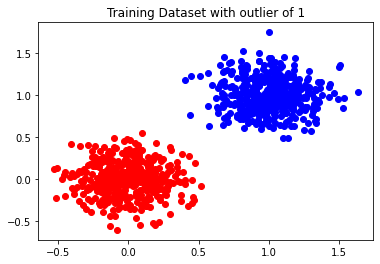

The accuracy rate of 1 outlier is:  1.0


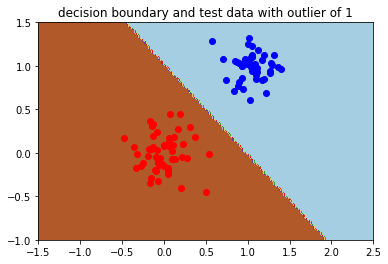

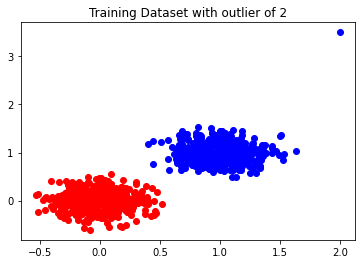

The accuracy rate of 2 outlier is:  1.0


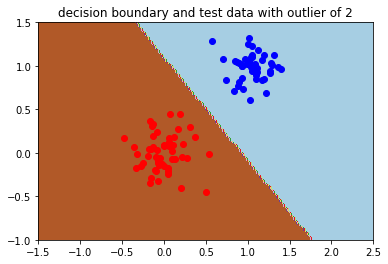

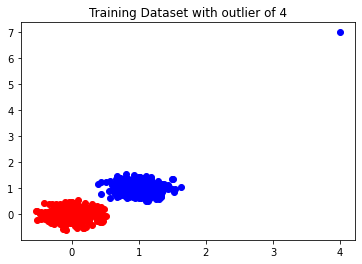

The accuracy rate of 4 outlier is:  1.0


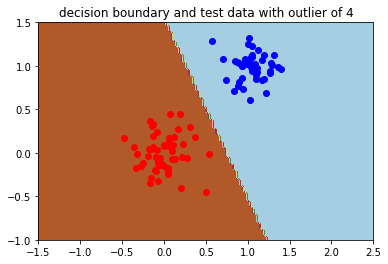

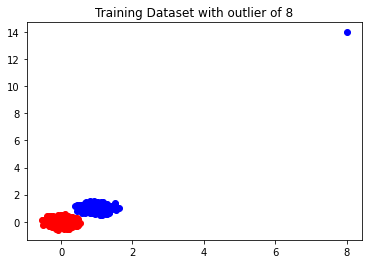

The accuracy rate of 8 outlier is:  0.98


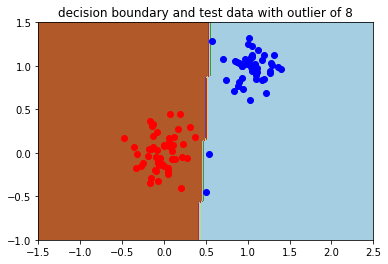

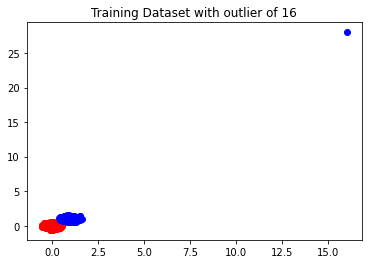

The accuracy rate of 16 outlier is:  0.93


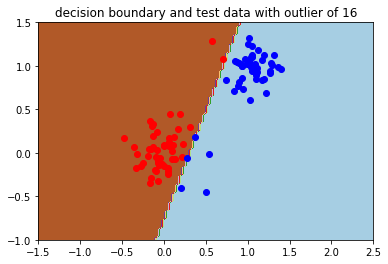

In [5]:
def task1():
    # get data
    for outlier in [1, 2, 4, 8, 16]:
        # get data. xplot, yplot is same as xtrain, ytrain but without outlier
        xtrain, xtest, ytrain, ytest, xplot, yplot = make_data(outlier=outlier)

        # TODO visualize xtrain via scatterplot
        xytrain = np.c_[xtrain, ytrain]
        plt.scatter(xytrain[xytrain[:, 2] == 1][:, 0], xytrain[xytrain[:, 2] == 1][:, 1], color="red")
        plt.scatter(xytrain[xytrain[:, 2] == -1][:, 0], xytrain[xytrain[:, 2] == -1][:, 1], color="blue")
        pltTitle = "Training Dataset with outlier of " + str(outlier)
        plt.title(pltTitle)
        plt.show()
        lls = LinearLeastSquares()
        lls.fit(xtrain, ytrain)

        # TODO evaluate accuracy and decision boundary of LLS
        y_predict = lls.predict(xtest)
        accuracy = np.sum((y_predict * ytest) == 1) / len(ytest)
        print("The accuracy rate of", outlier, "outlier is: ", accuracy)
        x = np.linspace(-1.5, 2.5, 100)
        y = np.linspace(-1.0, 1.5, 100)
        xx, yy = np.meshgrid(x, y)
        z = lls.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
        plt.contourf(xx, yy, z, cmap=plt.cm.Paired)
        xytest = np.c_[xtest, y_predict]
        # plt.scatter(xtest[:, 0], xtest[:, 1])
        plt.scatter(xytest[xytest[:, 2] == 1][:, 0], xytest[xytest[:, 2] == 1][:, 1], color="red")
        plt.scatter(xytest[xytest[:, 2] == -1][:, 0], xytest[xytest[:, 2] == -1][:, 1], color="blue")
        plt.xlim(-1.5, 2.5)
        plt.ylim(-1.0, 1.5)
        pltTitle = "decision boundary and test data with outlier of " + str(outlier)
        plt.title(pltTitle)
        plt.show()


if __name__ == "__main__":
    task1()

6. **How is the least square fit affected by the outlier? Give a short explanation.**

The outliers affect the average difference between the training samples and the target values, which affects the decision boundary. In a linear classifier, the slope of the decision boundary is influenced by the outliers.

### Task-2: k-Nearest Neighbors Classification

1. **Visualize the dataset using a scatter plot, with data points colored according to their label. You can use matplotlib or any other plotting library of your choice.**

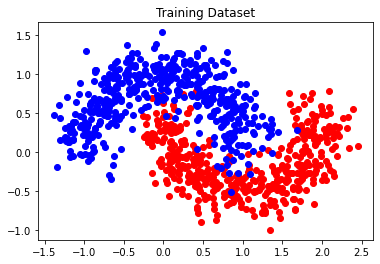

In [8]:
class KNN(object):
    def __init__(self, n_neighbors):
        self.n_neighbors = n_neighbors

    def fit(self, x, y):
        self.x = x
        self.y = y

    def kneighbors(self, xquery):
        # TODO return indices of nearest neighbor points and distances to them
        pass

    def predict(self, xquery):
        # TODO return predicted label for each query point
        pass


def task2():
    # get data
    n = 1000
    n_train = 900
    n_test = n - n_train
    x, y = sklearn.datasets.make_moons(n_samples=n, noise=0.2,
                                       random_state=0)
    xtrain, ytrain = x[:n_train,...], y[:n_train,...]
    xtest, ytest = x[n_train:,...], y[n_train:,...]

    # TODO visualize data via scatterplot
    xytrain = np.c_[xtrain, ytrain]
    plt.scatter(xytrain[xytrain[:, 2] == 1][:, 0], xytrain[xytrain[:, 2] == 1][:, 1], color="red")
    plt.scatter(xytrain[xytrain[:, 2] == 0][:, 0], xytrain[xytrain[:, 2] == 0][:, 1], color="blue")
    plt.title("Training Dataset")
    plt.show()
    # TODO for k=5 check that our implementation predicts the same as that of
    # sklearn.
    k = 5
    sknn = sklearn.neighbors.KNeighborsClassifier(n_neighbors=k)
    knn = KNN(n_neighbors=k)

    # analyze different values of k
    ks = [2**i for i in range(10)]
    for k in ks:
        # TODO fit and evaluate accuracy on test data
        knn = KNN(n_neighbors=k)

        # TODO plot decision boundary
        N = 100
        x = np.linspace(-1.5, 2.5, N)
        y = np.linspace(-1.0, 1.5, N)

task2()